# Binary Classification on Iris dataset using Perceptron and SVM #

## Binary classify function for calculating sign ##

In [8]:
import numpy as np

def give_sign(w,b,x):
    result = np.dot(w,x)+b
    if result >0:
        return 1
    else:
        return -1
    
# Test:
w = np.array([3,4])
x = np.array([2,2])
b = -14
give_sign(w,b,x)

-1

## Perceptron Algorithm ##

In [79]:
import random
def pc(x, y):
    # randomly gives an order for the indexing
    indices = random.sample(range(0,y.shape[0]), y.shape[0])
    
    # intialize w and b and u (# of updates)
    # initialize w base on the column number of x
    w = np.zeros(x.shape[1])
    b = 0
    u = 0
    for i in indices:
        data_x = x[i]
        data_y = y[i]
        result = give_sign(w,b,data_x)
        if data_y*result < 0:
            w = w+ data_y*data_x
            b = b + data_y
            u = u+1
    return [w,b,u]

## Load in Iris Dataset, analyze on feature index 1 and 3
Using feature index 1 and 3, and labels 0 and 1.

In [165]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,[1,3]]
y = iris.target
x_new = np.empty((0,2), float)
y_new = np.empty((0,1), int)
for i in range(y.shape[0]):
    if y[i] == 0:
        y_new = np.append(y_new, -1)
        x_new = np.append(x_new,np.array([x[i]]), axis=0)
    elif y[i] == 1:
        y_new = np.append(y_new, 1)
        x_new = np.append(x_new,np.array([x[i]]), axis=0)


print(x_new)
print(y_new)

[[ 3.5  0.2]
 [ 3.   0.2]
 [ 3.2  0.2]
 [ 3.1  0.2]
 [ 3.6  0.2]
 [ 3.9  0.4]
 [ 3.4  0.3]
 [ 3.4  0.2]
 [ 2.9  0.2]
 [ 3.1  0.1]
 [ 3.7  0.2]
 [ 3.4  0.2]
 [ 3.   0.1]
 [ 3.   0.1]
 [ 4.   0.2]
 [ 4.4  0.4]
 [ 3.9  0.4]
 [ 3.5  0.3]
 [ 3.8  0.3]
 [ 3.8  0.3]
 [ 3.4  0.2]
 [ 3.7  0.4]
 [ 3.6  0.2]
 [ 3.3  0.5]
 [ 3.4  0.2]
 [ 3.   0.2]
 [ 3.4  0.4]
 [ 3.5  0.2]
 [ 3.4  0.2]
 [ 3.2  0.2]
 [ 3.1  0.2]
 [ 3.4  0.4]
 [ 4.1  0.1]
 [ 4.2  0.2]
 [ 3.1  0.1]
 [ 3.2  0.2]
 [ 3.5  0.2]
 [ 3.1  0.1]
 [ 3.   0.2]
 [ 3.4  0.2]
 [ 3.5  0.3]
 [ 2.3  0.3]
 [ 3.2  0.2]
 [ 3.5  0.6]
 [ 3.8  0.4]
 [ 3.   0.3]
 [ 3.8  0.2]
 [ 3.2  0.2]
 [ 3.7  0.2]
 [ 3.3  0.2]
 [ 3.2  1.4]
 [ 3.2  1.5]
 [ 3.1  1.5]
 [ 2.3  1.3]
 [ 2.8  1.5]
 [ 2.8  1.3]
 [ 3.3  1.6]
 [ 2.4  1. ]
 [ 2.9  1.3]
 [ 2.7  1.4]
 [ 2.   1. ]
 [ 3.   1.5]
 [ 2.2  1. ]
 [ 2.9  1.4]
 [ 2.9  1.3]
 [ 3.1  1.4]
 [ 3.   1.5]
 [ 2.7  1. ]
 [ 2.2  1.5]
 [ 2.5  1.1]
 [ 3.2  1.8]
 [ 2.8  1.3]
 [ 2.5  1.5]
 [ 2.8  1.2]
 [ 2.9  1.3]
 [ 3.   1.4]
 [ 2.8  1.4]

In [166]:
[w,b,u] = pc(x_new, y_new)
print(w)
print(b)
print(u)

[-1.9  6.5]
1
11


## Plot

(100, 2)
(100,)


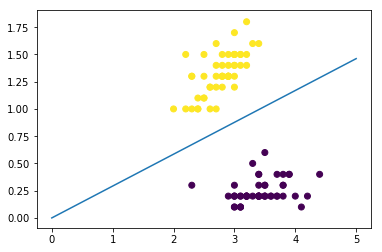

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

color = ['b', 'g', 'b']
print(x_new.shape)
print(y_new.shape)
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_new)
decision_x = np.linspace(0, 5, 100)
plt.plot(decision_x, -1*w[0]/w[1]*decision_x)
plt.show()

## Record update times after running algorithm 20 times

[2, 10, 6, 15, 2, 11, 17, 10, 15, 15, 6, 17, 13, 12, 13, 19, 2, 13, 6, 15]


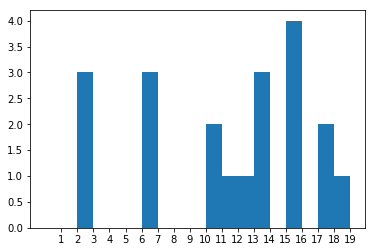

In [172]:
update_times = []
for i in range(20):
    [w,b,u] = pc(x_new, y_new)
    update_times.append(u)
print(update_times)
# plot
# plt.hist(update_times, bins=20, alpha=0.5,histtype='bar')
plt.hist(update_times, bins=np.arange(0,20, 1))
plt.xticks(range(1,20))
plt.show()

# Now analyze on feature index 0 and 2 using SVM

Using index 0 and 2, and labels 1 and 2. 

In [111]:
# For features 0 and 2, labels 1,2
x = iris.data[:,[0,2]]
y = iris.target
x_new = np.empty((0,2), float)
y_new = np.empty((0,1), int)
for i in range(y.shape[0]):
    if y[i] == 1:
        y_new = np.append(y_new, -1)
        x_new = np.append(x_new,np.array([x[i]]), axis=0)
    elif y[i] == 2:
        y_new = np.append(y_new, 1)
        x_new = np.append(x_new,np.array([x[i]]), axis=0)

print(x_new.shape)
print(y_new.shape)
print(x_new)
print(y_new)

(100, 2)
(100,)
[[ 7.   4.7]
 [ 6.4  4.5]
 [ 6.9  4.9]
 [ 5.5  4. ]
 [ 6.5  4.6]
 [ 5.7  4.5]
 [ 6.3  4.7]
 [ 4.9  3.3]
 [ 6.6  4.6]
 [ 5.2  3.9]
 [ 5.   3.5]
 [ 5.9  4.2]
 [ 6.   4. ]
 [ 6.1  4.7]
 [ 5.6  3.6]
 [ 6.7  4.4]
 [ 5.6  4.5]
 [ 5.8  4.1]
 [ 6.2  4.5]
 [ 5.6  3.9]
 [ 5.9  4.8]
 [ 6.1  4. ]
 [ 6.3  4.9]
 [ 6.1  4.7]
 [ 6.4  4.3]
 [ 6.6  4.4]
 [ 6.8  4.8]
 [ 6.7  5. ]
 [ 6.   4.5]
 [ 5.7  3.5]
 [ 5.5  3.8]
 [ 5.5  3.7]
 [ 5.8  3.9]
 [ 6.   5.1]
 [ 5.4  4.5]
 [ 6.   4.5]
 [ 6.7  4.7]
 [ 6.3  4.4]
 [ 5.6  4.1]
 [ 5.5  4. ]
 [ 5.5  4.4]
 [ 6.1  4.6]
 [ 5.8  4. ]
 [ 5.   3.3]
 [ 5.6  4.2]
 [ 5.7  4.2]
 [ 5.7  4.2]
 [ 6.2  4.3]
 [ 5.1  3. ]
 [ 5.7  4.1]
 [ 6.3  6. ]
 [ 5.8  5.1]
 [ 7.1  5.9]
 [ 6.3  5.6]
 [ 6.5  5.8]
 [ 7.6  6.6]
 [ 4.9  4.5]
 [ 7.3  6.3]
 [ 6.7  5.8]
 [ 7.2  6.1]
 [ 6.5  5.1]
 [ 6.4  5.3]
 [ 6.8  5.5]
 [ 5.7  5. ]
 [ 5.8  5.1]
 [ 6.4  5.3]
 [ 6.5  5.5]
 [ 7.7  6.7]
 [ 7.7  6.9]
 [ 6.   5. ]
 [ 6.9  5.7]
 [ 5.6  4.9]
 [ 7.7  6.7]
 [ 6.3  4.9]
 [ 6.7  5.7]
 [ 7.2  6

## Plot the data first

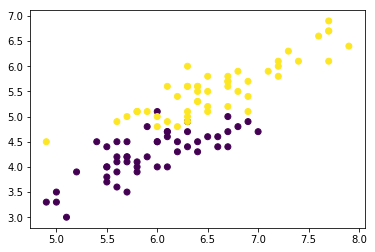

In [113]:
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_new)
plt.show()

## Classify the data using SVM

In [138]:
from sklearn.svm import SVC
def tryC(C_v):
    print("C: "+ str(C_v))
    clf = SVC(kernel='linear', C=C_v)
    clf.fit(x_new, y_new)
    print(clf.score(x_new, y_new))
    num_supp = clf.n_support_
    print(num_supp)

## Trying different C values

In [161]:
tryC(1.0)
tryC(2.0)
tryC(3.0)
tryC(5.0)
tryC(7.0)
tryC(9.0)
tryC(10.0)
tryC(11.75)
tryC(12.0)
tryC(50.0)

C: 1.0
0.93
[16 15]
C: 2.0
0.94
[12 12]
C: 3.0
0.95
[11 11]
C: 5.0
0.94
[10 11]
C: 7.0
0.95
[10  9]
C: 9.0
0.95
[10  9]
C: 10.0
0.95
[9 9]
C: 11.75
0.96
[9 8]
C: 12.0
0.96
[9 8]
C: 50.0
0.95
[7 7]


## Plot with the SVM with the best `C` value

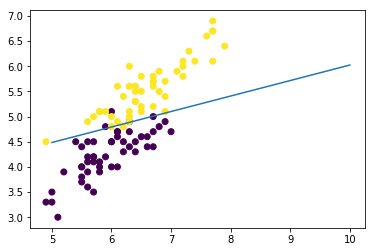

In [153]:
# Try with C = 3.0
clf = SVC(kernel='linear', C=11.5)
clf.fit(x_new, y_new)
w = clf.coef_
b = clf.intercept_

plt.scatter(x_new[:, 0], x_new[:, 1], c=y_new)
lines = np.linspace(5,10, 100)
plt.plot(lines, -1*w[0][0]/w[0][1]*lines-b/w[0][1])
plt.show()